# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Daffa Albari
- Email: daffaa.albari@outlook.com
- Id Dicoding: dududada

## Persiapan

### Menyiapkan library yang dibutuhkan

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# modelling
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

### Menyiapkan data yang akan diguankan

In [48]:
df = pd.read_csv('./data/employee_data.csv')

df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

**Insight**: Data terdiri dari 35 column dan terdiri dari 1470 baris

In [50]:
# mengecek missing values
df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

**Insight**: Terdapat missing values, yaitu pada column `Attrition`. Beberapa kolom akan diconvert menjadi tipe data yang sesuai

In [51]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [52]:
df.columns

Index(['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**Insight**: Tidak terdapat duplikasi data

### Melakukan EDA (Exploratory Data Analysis)

In [53]:
# Salin DataFrame
df_analisis = df.copy()

# Drop kolom yang tidak diperlukan
drop_columns = ['EmployeeId', 'Over18', 'EmployeeCount', 'StandardHours']
df_analisis.drop(columns=drop_columns, inplace=True)

# Mapping untuk pengkodean nilai-nilai kategorik
mapping_dict = {
    'BusinessTravel': {'Travel_Rarely': 1, 'Travel_Frequently': 2, 'Non-Travel': 3},
    'Department': {'Research & Development': 1, 'Sales': 2, 'Human Resources': 3},
    'EducationField': {'Life Sciences': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5, 'Other': 6},
    'Gender': {'Male': 1, 'Female': 2},
    'MaritalStatus': {'Married': 1, 'Single': 2, 'Divorced': 3},
    'JobRole': {'Sales Executive': 1, 'Research Scientist': 2, 'Laboratory Technician': 3, 'Manufacturing Director': 4, 
                'Healthcare Representative': 5, 'Manager': 6, 'Sales Representative': 7, 'Research Director': 8, 'Human Resources': 9},
    'OverTime': {'No': 1, 'Yes': 2}
}

# Lakukan penggantian nilai kategorik menggunakan mapping
for col, mapping in mapping_dict.items():
    if col in df_analisis.columns:
        df_analisis[col] = df_analisis[col].map(mapping)

# Mapping untuk pengembalian nilai ke bentuk awal
reverse_mapping_dict = {
    'Attrition': {0.0: 'No', 1.0: 'Yes'},
    'BusinessTravel': {1: 'Travel Rarely', 2: 'Travel Frequently', 3: 'Non Travel'},
    'Education': {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Master'},
    'EducationField': {1: 'Human Resources', 2: 'Life Science', 3: 'Medical', 4: 'Marketing', 5: 'Technical degree', 6: 'Other'},
    'EnvironmentSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'Department': {1: 'Research & Development', 2: 'Sales', 3: 'Human Resources'},
    'Gender': {1: 'Male', 2: 'Female'},
    'JobInvolvement': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'JobLevel': {1: 'Very Low', 2: 'Low', 3: 'Medium', 4: 'High', 5: 'Very High'},
    'MaritalStatus': {1: 'Single', 2: 'Married', 3: 'Divorced'},
    'JobSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'PerformanceRating': {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'},
    'RelationshipSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'StockOptionLevel': {0: 'Low', 1: 'Medium', 2: 'High', 3: 'Very High'},
    'WorkLifeBalance': {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'},
    'OverTime': {1: 'No', 2: 'Yes'},
    'JobRole': {1: 'Sales Executive', 2: 'Research Scientist', 3: 'Laboratory Technician', 4: 'Manufacturing Director', 
                5: 'Healthcare Representative', 6: 'Manager', 7: 'Sales Representative', 8: 'Research Director', 9: 'Human Resources'}
}

# Lakukan penggantian nilai kategorik menggunakan mapping
for col, mapping in reverse_mapping_dict.items():
    if col in df_analisis.columns:
        df_analisis[col] = df_analisis[col].map(mapping)

In [54]:
df_analisis['Attrition'].value_counts()

Attrition
No     879
Yes    179
Name: count, dtype: int64

#### Visualisasi Data Numerikal

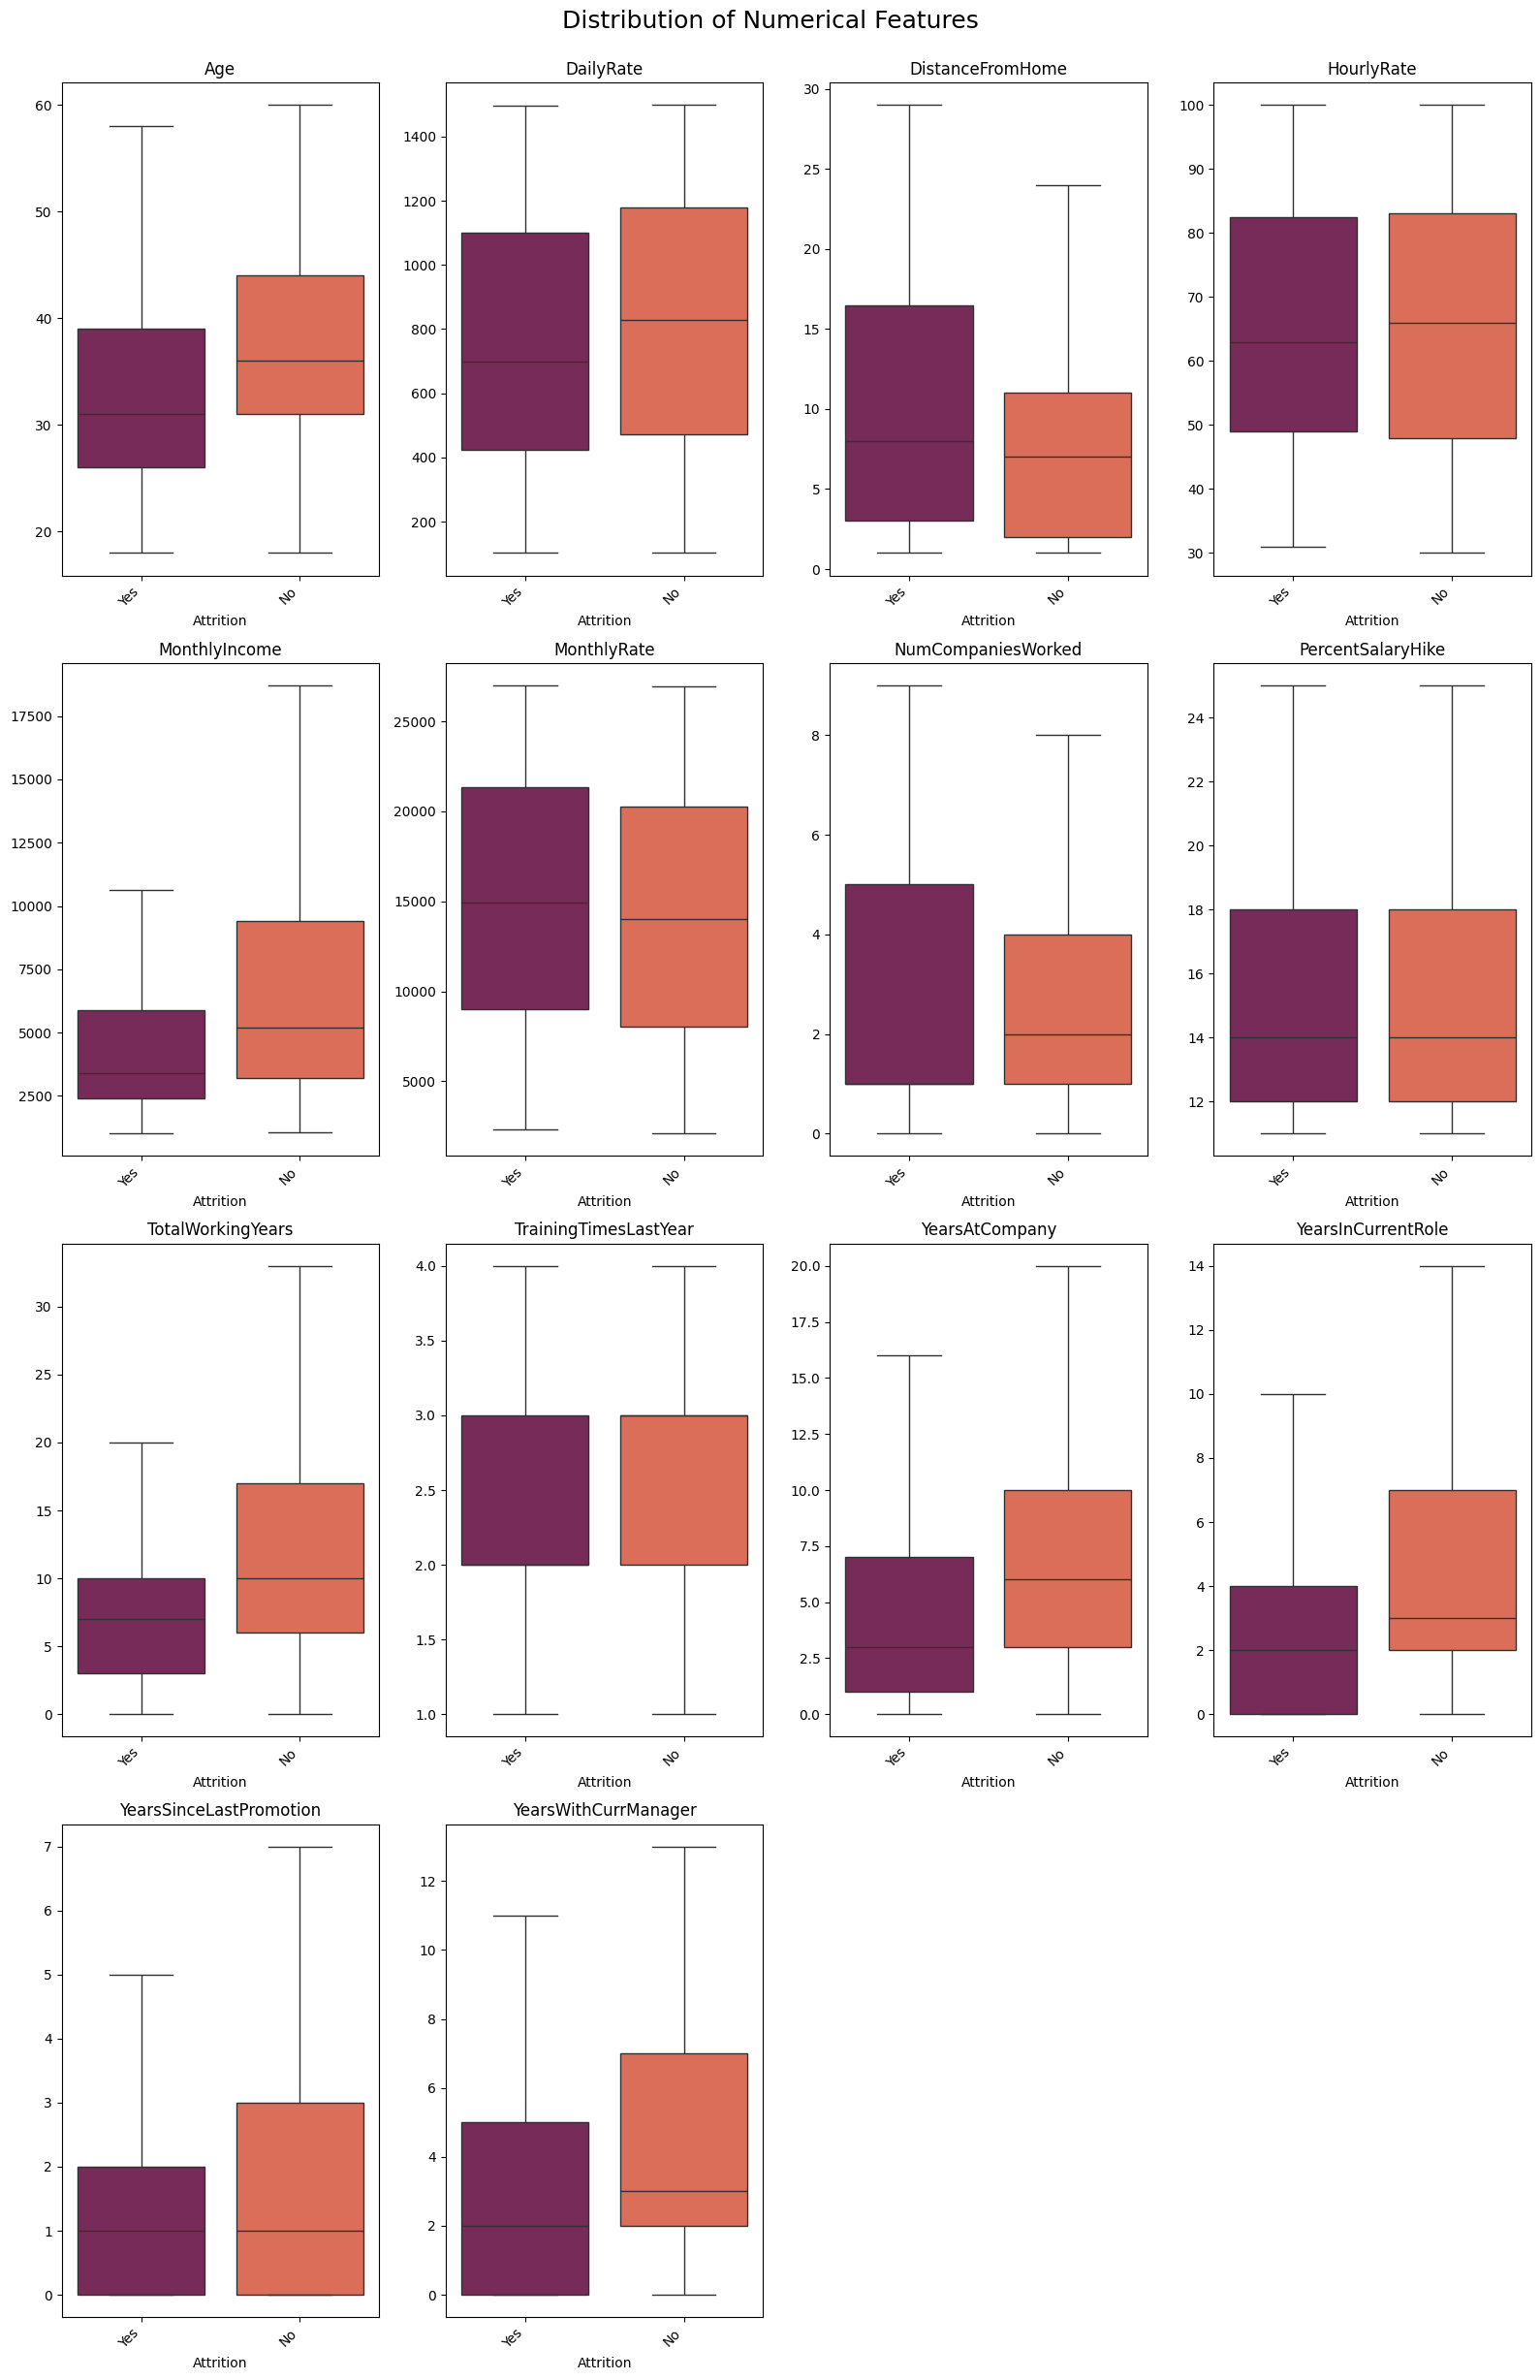

In [57]:
numerical_plot = df_analisis.select_dtypes(include=['int']).columns.tolist()
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 25))
fig.suptitle('Distribution of Numerical Features', fontsize=18)

for ax, var in zip(axes.flatten(), numerical_plot):
    sns.boxplot(data=df_analisis, y=var, x = 'Attrition', ax=ax, palette='rocket', showfliers=False)
    ax.set_title(var)
    ax.set_xlabel('Attrition')
    ax.set_ylabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for ax in axes.flatten()[len(numerical_plot):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

**Insight**: 
Berdasarkan output yang diperoleh, tidak semua fitur numerik menunjukkan pola yang signifikan terkait dengan keputusan karyawan untuk keluar dari perusahaan Jaya Jaya Maju. Namun, beberapa fitur numerik memiliki pola yang menarik, di antaranya:  

1. **Age**: Karyawan yang keluar dari perusahaan umumnya berada dalam rentang usia **28 hingga kurang dari 40 tahun**, yang berarti rata-rata usia mereka lebih muda dibandingkan dengan karyawan yang tetap bertahan di perusahaan.  

2. **Distance From Home**: Karyawan yang tinggal lebih jauh dari perusahaan memiliki kecenderungan lebih besar untuk meninggalkan perusahaan dibandingkan dengan karyawan yang tinggal lebih dekat.  

3. **Monthly Income**: Rata-rata gaji bulanan karyawan yang keluar lebih rendah dibandingkan dengan karyawan yang tetap bertahan di perusahaan.  

4. **Num Companies Worked**: Karyawan yang meninggalkan perusahaan biasanya memiliki pengalaman kerja di **1 hingga 5 perusahaan** sebelumnya. Namun, perbedaannya dengan karyawan yang bertahan tidak terlalu signifikan.  

5. **Total Working Years**: Karyawan yang keluar dari perusahaan cenderung memiliki **total pengalaman kerja yang lebih sedikit** dibandingkan dengan karyawan yang tetap bertahan.  

6. **Years at Company**: Rata-rata karyawan yang keluar telah bekerja di perusahaan selama **lebih dari 2,5 tahun hingga kurang dari 7,5 tahun**.  

7. **Years in Current Role**: Dari data tersebut, terlihat bahwa karyawan yang meninggalkan perusahaan umumnya memiliki **masa jabatan yang lebih pendek** di peran mereka saat ini dibandingkan dengan karyawan yang tetap bertahan.  

8. **Years Since Last Promotion**: Karyawan yang keluar dari perusahaan sebagian besar berada dalam rentang **0 hingga 2 tahun sejak promosi terakhir**, yang mungkin mengindikasikan hubungan antara lamanya waktu sejak promosi dan keputusan untuk meninggalkan perusahaan.  

9. **Years with Current Manager**: Karyawan yang meninggalkan perusahaan umumnya memiliki **masa kerja di bawah manajer saat ini kurang dari 6 tahun**, menunjukkan adanya potensi hubungan antara durasi supervisi manajer dan keputusan karyawan untuk keluar.  


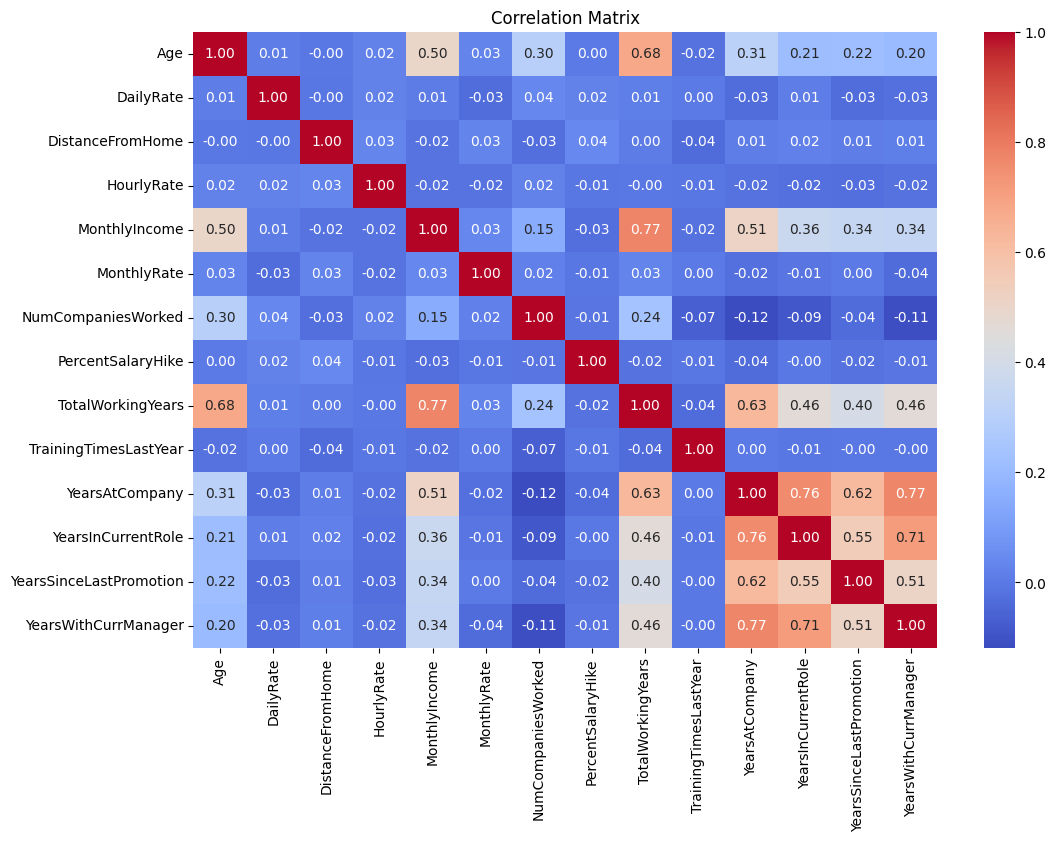

In [59]:
numerical_columns = df_analisis.select_dtypes(include=['int64', 'float64']).columns

# Hitung korelasi
correlation_matrix = df_analisis[numerical_columns].corr(method='pearson')

# Plot heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Mapping untuk pengkodean nilai-nilai kategorik
mapping_dict = {
    'BusinessTravel': {'Travel_Rarely': 1, 'Travel_Frequently': 2, 'Non-Travel': 3},
    'Department': {'Research & Development': 1, 'Sales': 2, 'Human Resources': 3},
    'EducationField': {'Life Sciences': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5, 'Other': 6},
    'Gender': {'Male': 1, 'Female': 2},
    'MaritalStatus': {'Married': 1, 'Single': 2, 'Divorced': 3},
    'JobRole': {'Sales Executive': 1, 'Research Scientist': 2, 'Laboratory Technician': 3, 'Manufacturing Director': 4, 
                'Healthcare Representative': 5, 'Manager': 6, 'Sales Representative': 7, 'Research Director': 8, 'Human Resources': 9},
    'OverTime': {'No': 1, 'Yes': 2}
}


In [65]:
df_corr = df.copy()
df_corr['BusinessTravel'].replace({'Travel_Rarely' : 1, 'Travel_Frequently' : 2, 'Non-Travel': 3}, inplace=True)
df_corr['Department'].replace({'Research & Development' : 1, 'Sales' : 2, 'Human Resources': 3}, inplace=True)
df_corr['EducationField'].replace({'Life Sciences' : 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4,
                                'Human Resources' : 5, 'Other': 6}, inplace=True)
df_corr['Gender'].replace({'Male': 1, 'Female': 2}, inplace=True)
df_corr['MaritalStatus'].replace({'Married': 1, 'Single': 2, 'Divorced' : 3}, inplace=True)
df_corr['JobRole'].replace({'Sales Executive' : 1, 'Research Scientist': 2, 'Laboratory Technician': 3,
                            'Manufacturing Director': 4, 'Healthcare Representative' : 5, 'Manager': 6,
                            'Sales Representative': 7, 'Research Director': 8, 'Human Resources': 9}, inplace=True)
df_corr['OverTime'].replace({'No': 1, 'Yes': 2}, inplace=True)

In [67]:
df_corr.drop(columns=['EmployeeId', 'Over18', 'EmployeeCount', 'StandardHours'], inplace=True)

In [69]:
df_corr.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.172067,-0.024751,0.010661,-0.007652,-0.001686,0.208034,-0.035850,0.010146,0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.172067,1.000000,0.008008,-0.051992,0.050928,0.078074,-0.032631,0.046056,-0.132848,-0.015887,...,0.007755,-0.053417,-0.164228,-0.177137,-0.047859,-0.059556,-0.135134,-0.158757,-0.031944,-0.155962
BusinessTravel,-0.024751,0.008008,1.000000,0.004086,-0.000935,0.024469,-0.000757,-0.025657,-0.004174,-0.032981,...,0.026341,0.035986,0.016727,-0.034226,-0.015240,0.011256,0.014575,0.011497,0.032591,0.022636
DailyRate,0.010661,-0.051992,0.004086,1.000000,-0.021959,-0.004985,-0.016806,-0.018291,0.018355,0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.007652,0.050928,-0.000935,-0.021959,1.000000,0.002196,0.019636,0.189416,-0.026110,0.000488,...,-0.029648,0.016154,-0.015585,-0.006602,-0.008549,0.075507,0.029752,0.009204,0.008394,0.002874
DistanceFromHome,-0.001686,0.078074,0.024469,-0.004985,0.002196,1.000000,0.021042,0.005369,-0.016075,0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.032631,-0.000757,-0.016806,0.019636,0.021042,1.000000,0.033467,-0.027128,0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.035850,0.046056,-0.025657,-0.018291,0.189416,0.005369,0.033467,1.000000,0.061149,-0.017465,...,-0.014649,-0.000440,-0.020446,-0.027703,-0.005588,0.047322,-0.022710,-0.015588,-0.029528,-0.010316
EnvironmentSatisfaction,0.010146,-0.132848,-0.004174,0.018355,-0.026110,-0.016075,-0.027128,0.061149,1.000000,-0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,0.036311,-0.015887,-0.032981,0.011716,0.000488,0.001851,0.016547,-0.017465,-0.000508,1.000000,...,0.013859,-0.022868,-0.012716,0.046881,0.038787,0.002753,0.029747,0.041483,0.026985,0.030599


**Insight**: Dari hasil output korelasi di atas, dapat disimpulkan bahwa feature yang memiliki pengaruh paling kuat dengan Attrition yaitu feature OverTime. hal ini akan dijadikan sebagai analisis lebih lanjut perihal feature apa yang sangat sensitif untuk karyawan yang melakukan overtime sehingga menjadi penyebab terbesar untuk meninggalkan perusahaan.

#### Analisis Data Kategorikal

In [55]:

Attrition_var = df_analisis.Attrition.value_counts().to_frame()

labels = Attrition_var.index
fig = go.Figure()
fig.add_trace(go.Pie(values=[1291, 179], title='Attrition Condition ', labels=labels, hole=0.5))
fig.update_layout(autosize=False, width=500, height=450)
fig.show()

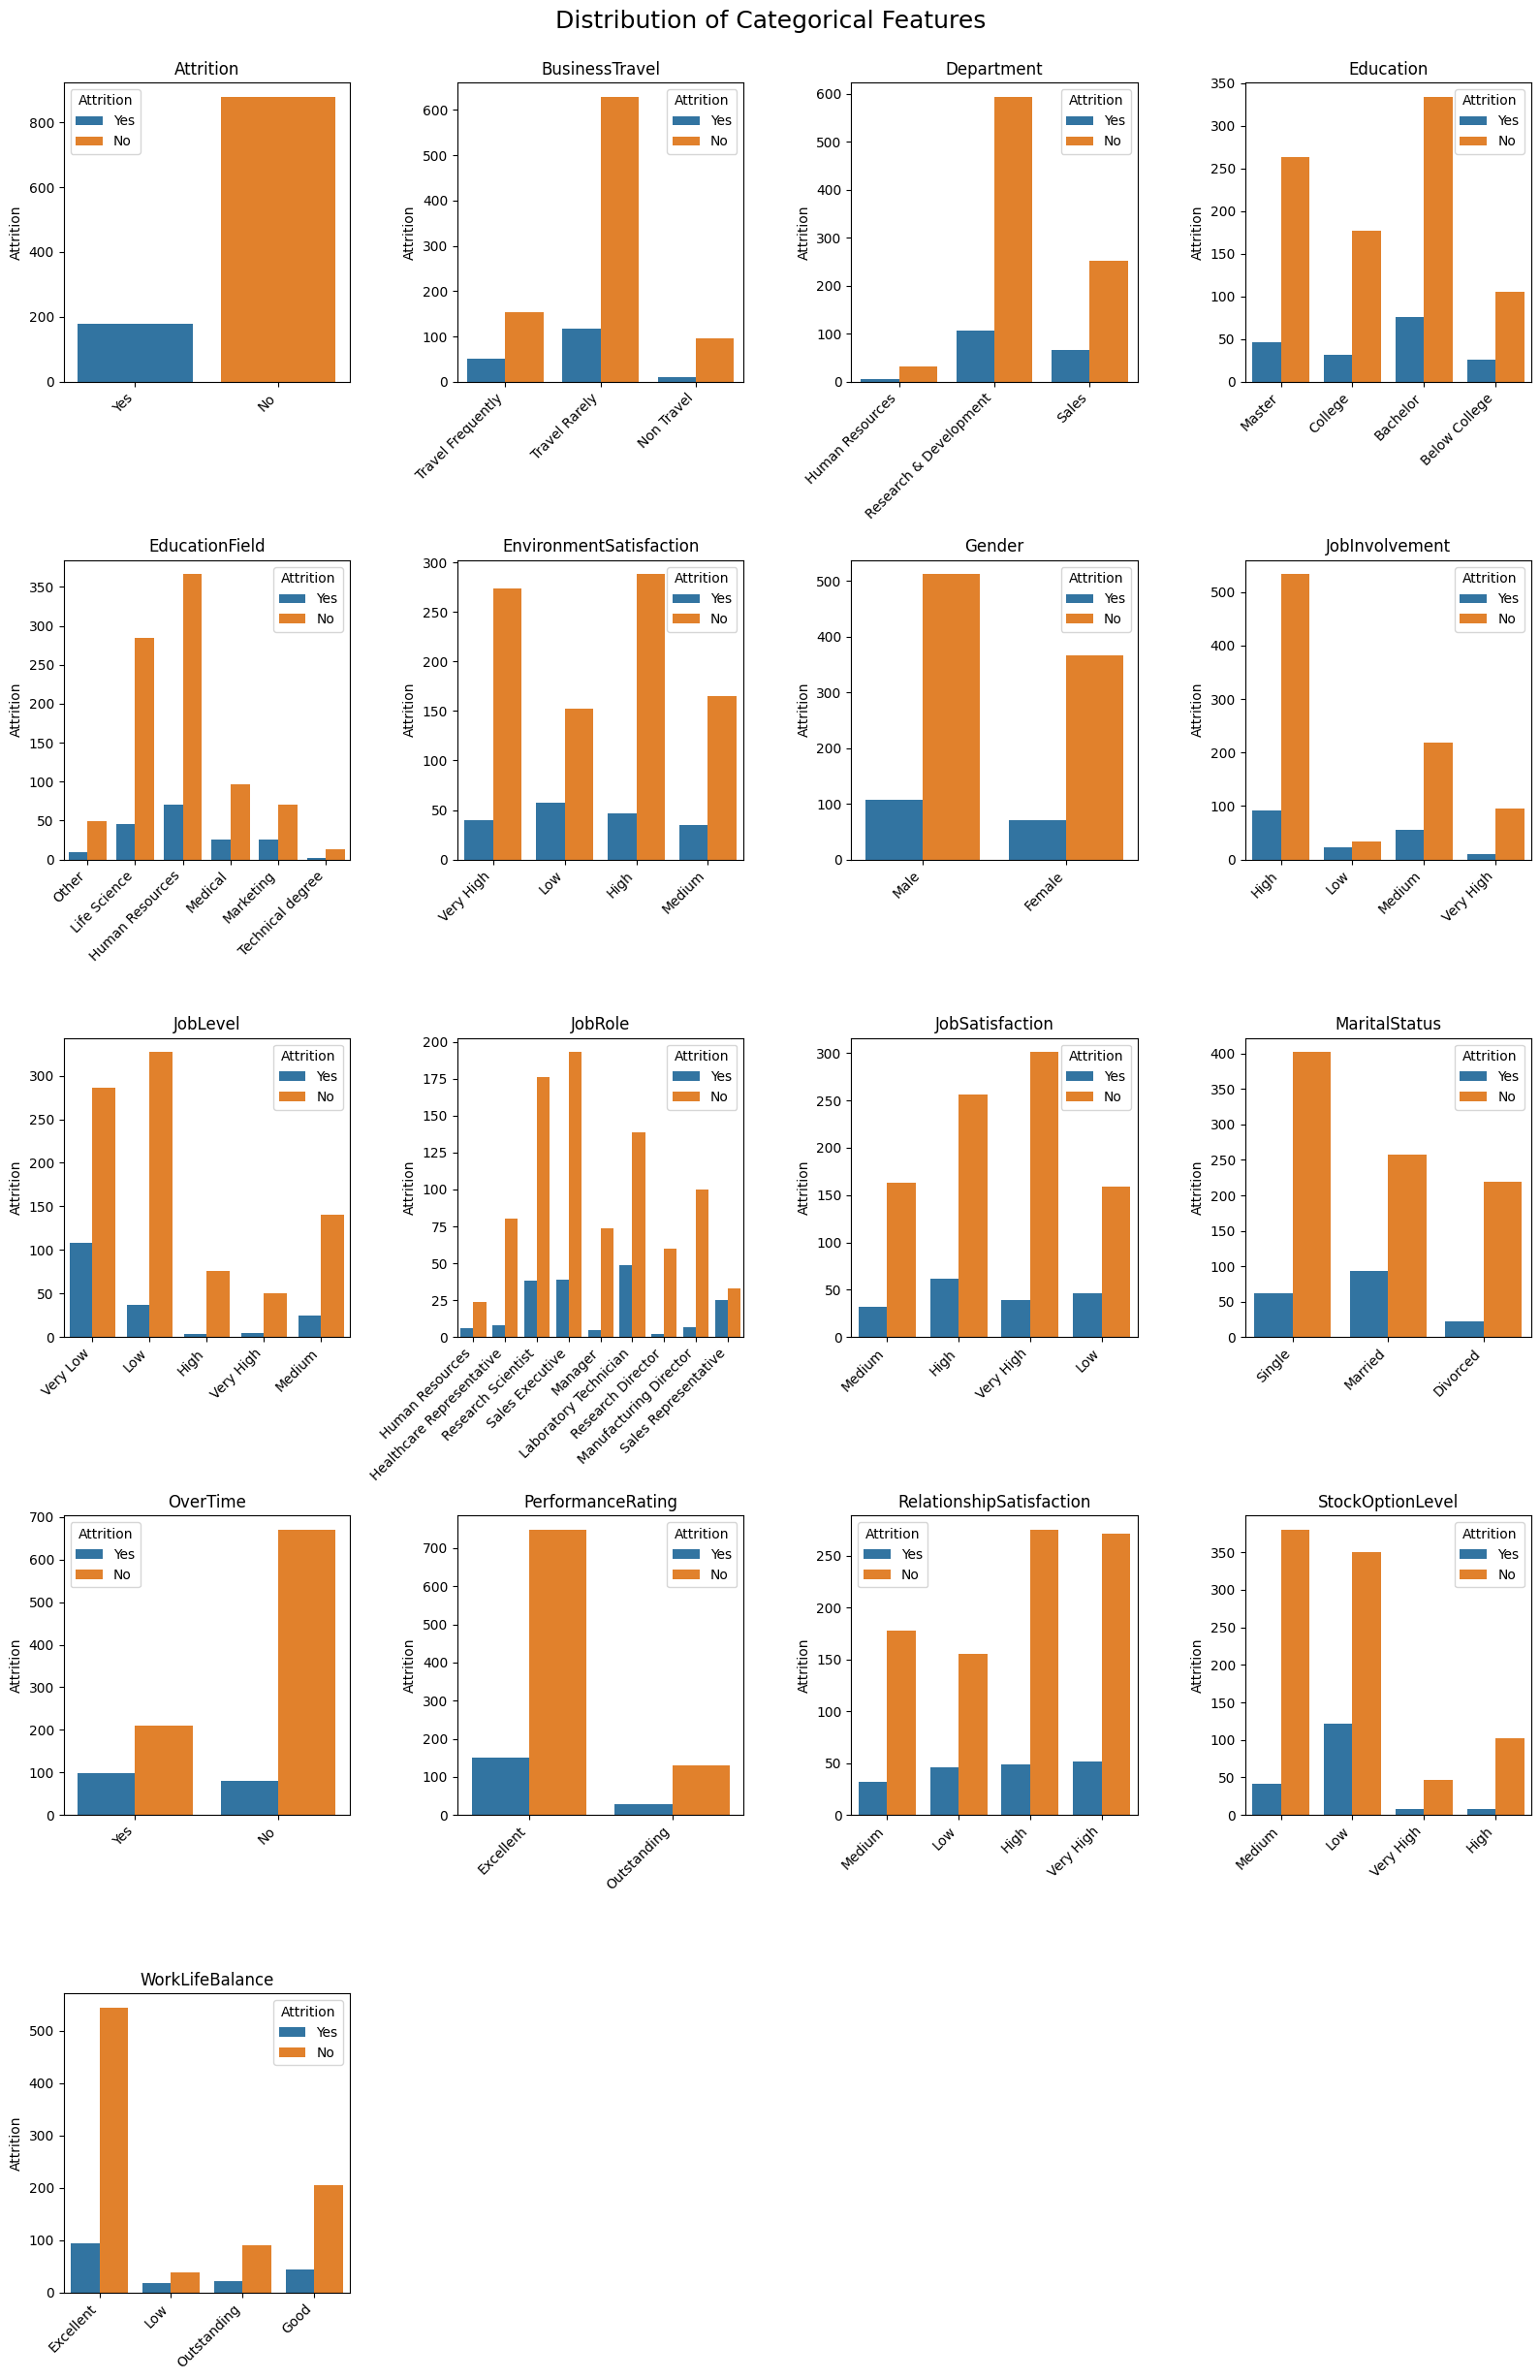

In [56]:

categorical_plot = df_analisis.select_dtypes(include=['object']).columns.tolist()
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 25))
fig.suptitle('Distribution of Categorical Features', fontsize=18)

for ax, var in zip(axes.flatten(), categorical_plot):
    sns.countplot(data=df_analisis, x=var, hue = 'Attrition', ax=ax)
    ax.set_title(var)
    ax.set_xlabel('')
    ax.set_ylabel('Attrition')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for ax in axes.flatten()[len(categorical_plot):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()
     

**Insight**:
Berdasarkan output yang ditampilkan, dapat disimpulkan bahwa tidak semua fitur kategorikal menunjukkan pola yang signifikan terkait dengan keputusan karyawan untuk keluar dari perusahaan Jaya Jaya Maju. Namun, terdapat beberapa fitur kategorikal yang memiliki pola menarik, di antaranya:  

1. **Environment Satisfaction**: Karyawan dengan tingkat kepuasan lingkungan kerja pada label **"Low"** memiliki jumlah keluar yang paling tinggi, meskipun total karyawan dengan label ini lebih sedikit dibandingkan total karyawan dengan label **"High"**, **"Medium"**, dan **"Very High"**.  

2. **Job Level**: Pada fitur **Job Level**, terlihat bahwa karyawan yang keluar paling banyak berada di level **"Very Low"**, meskipun total jumlah karyawan pada level ini tidak jauh berbeda dari total karyawan pada level **"Low"**.  

3. **Job Role**: Karyawan yang paling banyak meninggalkan perusahaan berasal dari posisi **Laboratory Technician**, meskipun total jumlah karyawan yang bekerja di posisi ini tidak termasuk yang tertinggi jika dibandingkan dengan jumlah karyawan dari posisi lainnya.  

4. **Marital Status**: Dari segi status pernikahan, karyawan yang telah menikah memiliki tingkat keluar yang lebih tinggi dibandingkan dengan karyawan yang lajang atau bercerai, meskipun total jumlah karyawan yang menikah lebih rendah dibandingkan kedua kelompok tersebut.  

5. **Over Time**: Karyawan yang bekerja lembur memiliki tingkat keluar yang lebih tinggi dibandingkan karyawan yang tidak lembur. Padahal, total karyawan yang melakukan lembur jauh lebih sedikit dibandingkan dengan karyawan yang tidak melakukan lembur.  

6. **Stock Option Level**: Karyawan dengan level opsi saham **"Low"** memiliki tingkat keluar yang lebih tinggi dibandingkan dengan karyawan di level opsi saham lainnya.  


## Data Preparation / Preprocessing

In [21]:
df = df.dropna()

In [7]:
# cek missing values
df.isnull().sum()

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Insight**: Sudah tidak terdapat missing values

In [8]:
# Mengubah tipe data pada kolom yang tidak sesuai
category_column = ['Attrition', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 
                  'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

df[category_column] = df[category_column].astype(str)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1058 non-null   int64 
 1   Age                       1058 non-null   int64 
 2   Attrition                 1058 non-null   object
 3   BusinessTravel            1058 non-null   object
 4   DailyRate                 1058 non-null   int64 
 5   Department                1058 non-null   object
 6   DistanceFromHome          1058 non-null   int64 
 7   Education                 1058 non-null   object
 8   EducationField            1058 non-null   object
 9   EmployeeCount             1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   object
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   object
 14  JobLevel                  105

**Insight**: Beberapa kolom sudah diconvert menjadi tipe data yang sesuai. Hal ini dilakukan untuk mempermudah analisis data selanjutnya

In [11]:
attrition_category = {'0.0':'No', '1.0':'Yes'}
education_category = {'1':'Below College', '2':'College', '3':'Bachelor', '4':'Master', '5':'Doctor'}
rate_category = {'1':'Low', '2':'Medium', '3':'High', '4':'Very High'}
perform_work_category = {'1':'Low', '2':'Good', '3':'Excellent', '4':'Outstanding'}


hr_df = df.replace({
    'Attrition': attrition_category, 
    'Education':education_category, 
    'EnvironmentSatisfaction': rate_category, 
    'JobInvolvement': rate_category, 
    'JobSatisfaction': rate_category, 
    'RelationshipSatisfaction': rate_category,
    'PerformanceRating': perform_work_category,
    'WorkLifeBalance': perform_work_category
})

In [12]:
hr_df.head().T

,1,2,3,6,7
EmployeeId,2,3,4,7,8
Age,37,51,42,40,55
Attrition,Yes,Yes,No,No,Yes
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely
DailyRate,1141,1323,555,1124,725
Department,Research & Development,Research & Development,Sales,Sales,Research & Development
DistanceFromHome,11,4,26,1,2
Education,College,Master,Bachelor,College,Bachelor
EducationField,Medical,Life Sciences,Marketing,Medical,Medical
EmployeeCount,1,1,1,1,1


In [13]:
hr_df.describe(include='O')

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
count,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058
unique,2,3,3,5,6,4,2,4,5,9,4,3,1,2,2,4,4,4
top,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,High,Male,High,1,Sales Executive,Very High,Married,Y,No,Excellent,High,0,Excellent
freq,879,746,701,410,436,335,620,625,394,232,340,464,1058,751,899,324,471,638


In [14]:
hr_df.nunique()

EmployeeId                  1058
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    731
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                991
MonthlyRate                 1038
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [15]:
# drop kolom dengan 1 nilai
hr_df.drop(columns=['StandardHours', 'Over18', 'EmployeeCount'], inplace=True)

## Feature Engineering

In [104]:
# Menghitung Total Satisfaction
hr_df['OverallSatisfaction'] = df['EnvironmentSatisfaction'].astype(int) + df['JobSatisfaction'].astype(int) + df['RelationshipSatisfaction'].astype(int)

# Menghitung rata-rata lama bekerja di setiap perusahaan
hr_df['AverageTenurePerCompany'] = hr_df['TotalWorkingYears'] / (hr_df['NumCompaniesWorked'] + 1) # +1 untuk menghindari pembagian dengan 0

# Menghitung rata-rata frekuensi promosi
hr_df['PromotionRate'] = hr_df['YearsAtCompany'] / (hr_df['YearsSinceLastPromotion'] + 1)

In [105]:
hr_df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverallSatisfaction,AverageTenurePerCompany,PromotionRate
1,2,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,...,15,2,Low,1,0,0,0,4,2.500000,1.000000
2,3,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,...,18,2,Outstanding,10,0,2,7,7,1.800000,3.333333
3,4,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,...,23,2,Outstanding,20,4,4,8,9,3.833333,4.000000
6,7,40,No,Travel_Rarely,1124,Sales,1,College,Medical,Medium,...,6,2,Good,4,3,0,2,9,2.000000,4.000000
7,8,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,...,24,2,Excellent,5,2,1,4,9,4.000000,2.500000


In [106]:
hr_df.columns

Index(['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'OverallSatisfaction', 'AverageTenurePerCompany', 'PromotionRate'],
      dtype='object')

In [107]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   object 
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   object 
 8   EducationField            1058 non-null   object 
 9   EnvironmentSatisfaction   1058 non-null   object 
 10  Gender                    1058 non-null   object 
 11  HourlyRate                1058 non-null   int64  
 12  JobInvolvement            1058 non-null   object 
 13  JobLevel                  1058 non-null   object 
 14  JobRole      

In [108]:
hr_df.tail()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverallSatisfaction,AverageTenurePerCompany,PromotionRate
1464,1465,28,Yes,Non-Travel,1366,Research & Development,24,College,Technical Degree,Medium,...,10,2,Good,10,7,1,9,4,5.0,5.0
1465,1466,38,No,Travel_Rarely,168,Research & Development,1,Bachelor,Life Sciences,High,...,10,4,Outstanding,1,0,0,0,10,2.0,1.0
1467,1468,28,Yes,Travel_Rarely,1485,Research & Development,12,Below College,Life Sciences,High,...,1,4,Good,1,1,0,0,11,0.5,1.0
1468,1469,40,No,Non-Travel,458,Research & Development,16,College,Life Sciences,High,...,6,0,Excellent,4,2,0,0,8,0.6,4.0
1469,1470,19,Yes,Travel_Frequently,602,Sales,1,Below College,Technical Degree,High,...,1,5,Outstanding,0,0,0,0,5,1.0,0.0


## Modelling

In [110]:
modelling_column = ['BusinessTravel','Department', 'EducationField', 'JobRole', 'OverTime', 'MaritalStatus', "Attrition"]

modelling_df = hr_df[modelling_column]

modelling_df.head()

,BusinessTravel,Department,EducationField,JobRole,OverTime,MaritalStatus,Attrition
1,Travel_Rarely,Research & Development,Medical,Healthcare Representative,No,Married,Yes
2,Travel_Rarely,Research & Development,Life Sciences,Research Scientist,Yes,Married,Yes
3,Travel_Frequently,Sales,Marketing,Sales Executive,No,Married,No
6,Travel_Rarely,Sales,Medical,Sales Executive,Yes,Married,No
7,Travel_Rarely,Research & Development,Medical,Manager,Yes,Married,Yes


In [111]:
modelling_df.tail()

,BusinessTravel,Department,EducationField,JobRole,OverTime,MaritalStatus,Attrition
1464,Non-Travel,Research & Development,Technical Degree,Healthcare Representative,No,Single,Yes
1465,Travel_Rarely,Research & Development,Life Sciences,Manufacturing Director,Yes,Single,No
1467,Travel_Rarely,Research & Development,Life Sciences,Laboratory Technician,Yes,Married,Yes
1468,Non-Travel,Research & Development,Life Sciences,Research Scientist,No,Divorced,No
1469,Travel_Frequently,Sales,Technical Degree,Sales Representative,No,Single,Yes


In [112]:
# Kolom kategorikal yang akan di-encode
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'OverTime', 'MaritalStatus']

# OneHotEncoder untuk kolom kategorikal
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(modelling_df[categorical_columns])

# Mendapatkan nama kolom baru setelah encoding
encoded_columns = encoder.get_feature_names_out(categorical_columns)

# Membuat DataFrame baru dengan data yang sudah di-encode
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Reset indeks pada DataFrame
modelling_df_reset = modelling_df.reset_index(drop=True)
encoded_df_reset = encoded_df.reset_index(drop=True)

# Menggabungkan DataFrame asli dengan DataFrame yang sudah di-encode
df_encoded = pd.concat([modelling_df_reset.drop(categorical_columns, axis=1), encoded_df_reset], axis=1)

In [113]:
df_encoded.tail()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_No,OverTime_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1053,Yes,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1054,No,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1055,Yes,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1056,No,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1057,Yes,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [114]:
from sklearn.impute import SimpleImputer

# Pisahkan fitur dan target
X = df_encoded.drop(['Attrition'], axis=1)
y = df_encoded['Attrition']

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [115]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(793, 26)
(265, 26)
(793,)
(265,)


In [116]:
y

0       Yes
1       Yes
2        No
3        No
4       Yes
       ... 
1053    Yes
1054     No
1055    Yes
1056     No
1057    Yes
Name: Attrition, Length: 1058, dtype: object

In [117]:
# Melatih model RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi menggunakan set pengujian
y_pred = model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7886792452830189

Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.94      0.88       215
         Yes       0.35      0.14      0.20        50

    accuracy                           0.79       265
   macro avg       0.59      0.54      0.54       265
weighted avg       0.73      0.79      0.75       265



In [119]:
# Simpan model
joblib.dump(model, 'modelling.pkl')

# Simpan encoder
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

## Send To Databse

In [17]:
from sqlalchemy import create_engine
# from sqlalchemy.pool import NullPool
from dotenv import load_dotenv
import os

# Load environment variables from .env
load_dotenv()

# Fetch variables
USER = os.getenv("user")
PASSWORD = os.getenv("password")
HOST = os.getenv("host")
PORT = os.getenv("port")
DBNAME = os.getenv("dbname")

In [18]:
# Construct the SQLAlchemy connection string
DATABASE_URL = f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}?sslmode=require"

# Create the SQLAlchemy engine
engine = create_engine(DATABASE_URL)
try:
    with engine.connect() as connection:
        print("Connection successful!")
except Exception as e:
    print(f"Failed to connect: {e}")

Connection successful!


In [19]:
hr_df.to_sql('employee_attrition', engine)

150